# Analyse Énergétique - Notebook

## 1. Import des bibliothèques et du code

In [11]:
# Pour affichage inline des graphiques
%matplotlib inline

# Imports standards
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Ajout du dossier src au path pour les imports relatifs
src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)


In [12]:

def find_project_root():
    current_dir = os.getcwd()
    print(f"Dossier de travail courant: {current_dir}")
    while not any(folder in os.listdir(current_dir) for folder in ['data', 'src']):
        parent_dir = os.path.dirname(current_dir)
        if parent_dir == current_dir:
            print("Racine du projet non trouvée, du coup ça reste dans le notebook.")
            break
        current_dir = parent_dir
    print(f"Racine projet détectée: {current_dir}")
    return current_dir


In [13]:
# Imports du projet
from processing.data_processing import load_data
from processing.statistics_ import save_statistics
from visualization.visualization import plot_data, plot_data_interactive

## 2. Chargement des données

In [14]:
df = load_data("../data/energy_data.csv")

In [15]:

df.head()


,date,index,price_per_kwh,devices,temps,consumption_kwh,cost
0,2024-12-06,8182,0.11,"Washer, Router, Fridge",pluie,0.0,0.00
1,2024-12-07,8353,0.09,"Microwave, Heater, Toaster",pluie,171.0,15.39
2,2024-12-08,8548,0.10,"Coffee Machine, Toaster, Router, Oven",mitigé,195.0,19.50
3,2024-12-09,8603,0.15,"Router, AC",pluie,55.0,8.25
4,2024-12-10,8681,0.12,"Dryer, Heater, Coffee Machine, AC, Oven",gris,78.0,9.36


## 3. Statistiques descriptives

In [16]:
df.describe()

,date,index,price_per_kwh,consumption_kwh,cost
count,45,45.000000,45.000000,45.000000,45.000000
mean,2024-12-28 00:00:00,11002.311111,0.116000,124.311111,14.370444
min,2024-12-06 00:00:00,8182.000000,0.090000,0.000000,0.000000
25%,2024-12-17 00:00:00,9366.000000,0.100000,94.000000,9.600000
50%,2024-12-28 00:00:00,10969.000000,0.120000,121.000000,14.190000
75%,2025-01-08 00:00:00,12540.000000,0.130000,159.000000,19.400000
max,2025-01-19 00:00:00,13776.000000,0.150000,200.000000,23.920000
std,NaN,1728.201967,0.017889,47.432163,5.810212


## 4. Appareils les plus utilisés

## 5. Visualisation statique avec Matplotlib

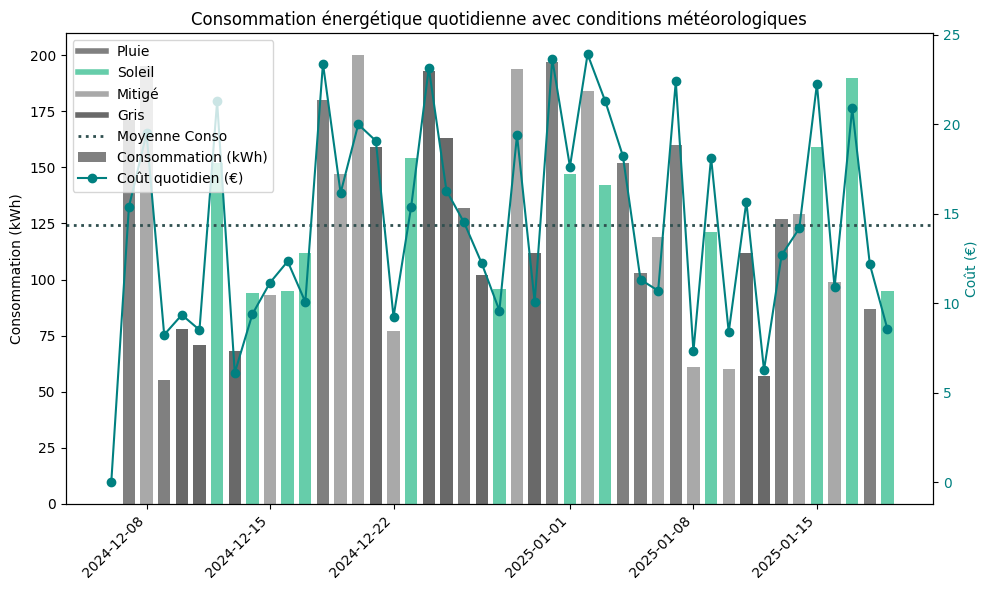

In [17]:
plot_data(df)

## 6. Visualisation interactive avec Plotly

In [18]:
plot_data_interactive(df)

In [19]:
from collections import Counter

device_list = df["devices"].str.split(", ").sum()
device_counts = Counter(device_list)
pd.DataFrame(device_counts.most_common(), columns=["Appareil", "Occurrences"])

,Appareil,Occurrences
0,Toaster,15
1,Dishwasher,14
2,Dryer,13
3,Washer,12
4,Router,12
5,Fridge,12
6,Microwave,11
7,AC,10
8,Lamp,10
9,Oven,9
